In [46]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [47]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [48]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [49]:
tr_df = train_df('Train')

In [50]:
tr_df

,Class Path,Class
0,Train\Normal Nail\1.PNG,Normal Nail
1,Train\Normal Nail\10.PNG,Normal Nail
2,Train\Normal Nail\11.PNG,Normal Nail
3,Train\Normal Nail\12.PNG,Normal Nail
4,Train\Normal Nail\13.jpg,Normal Nail
...,...,...
77,Train\Vitamin C Deficiency Nail\5.PNG,Vitamin C Deficiency Nail
78,Train\Vitamin C Deficiency Nail\6.PNG,Vitamin C Deficiency Nail
79,Train\Vitamin C Deficiency Nail\7.PNG,Vitamin C Deficiency Nail
80,Train\Vitamin C Deficiency Nail\8.PNG,Vitamin C Deficiency Nail


In [51]:
ts_df = test_df('Test')

In [52]:
ts_df

,Class Path,Class
0,Test\Normal Nail\1.PNG,Normal Nail
1,Test\Normal Nail\10.PNG,Normal Nail
2,Test\Normal Nail\11.PNG,Normal Nail
3,Test\Normal Nail\12.PNG,Normal Nail
4,Test\Normal Nail\13.jpg,Normal Nail
...,...,...
77,Test\Vitamin C Deficiency Nail\5.PNG,Vitamin C Deficiency Nail
78,Test\Vitamin C Deficiency Nail\6.PNG,Vitamin C Deficiency Nail
79,Test\Vitamin C Deficiency Nail\7.PNG,Vitamin C Deficiency Nail
80,Test\Vitamin C Deficiency Nail\8.PNG,Vitamin C Deficiency Nail


In [53]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [54]:
valid_df

,Class Path,Class
16,Test\Normal Skin\10.jpg,Normal Skin
3,Test\Normal Nail\12.PNG,Normal Nail
13,Test\Normal Nail\8.PNG,Normal Nail
42,Test\Vitamin B12 Deficiency Skin\16.jpg,Vitamin B12 Deficiency Skin
18,Test\Normal Skin\12.jpg,Normal Skin
47,Test\Vitamin B12 Deficiency Skin\20.jpg,Vitamin B12 Deficiency Skin
8,Test\Normal Nail\3.PNG,Normal Nail
72,Test\Vitamin C Deficiency Nail\25.PNG,Vitamin C Deficiency Nail
28,Test\Normal Skin\3.jpg,Normal Skin
51,Test\Vitamin B12 Deficiency Skin\6.jpg,Vitamin B12 Deficiency Skin


In [55]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 82 validated image filenames belonging to 4 classes.
Found 41 validated image filenames belonging to 4 classes.
Found 41 validated image filenames belonging to 4 classes.


Class Distribution in the Training Dataset:
Class
Vitamin C Deficiency Nail      27
Normal Skin                    20
Vitamin B12 Deficiency Skin    20
Normal Nail                    15
Name: count, dtype: int64


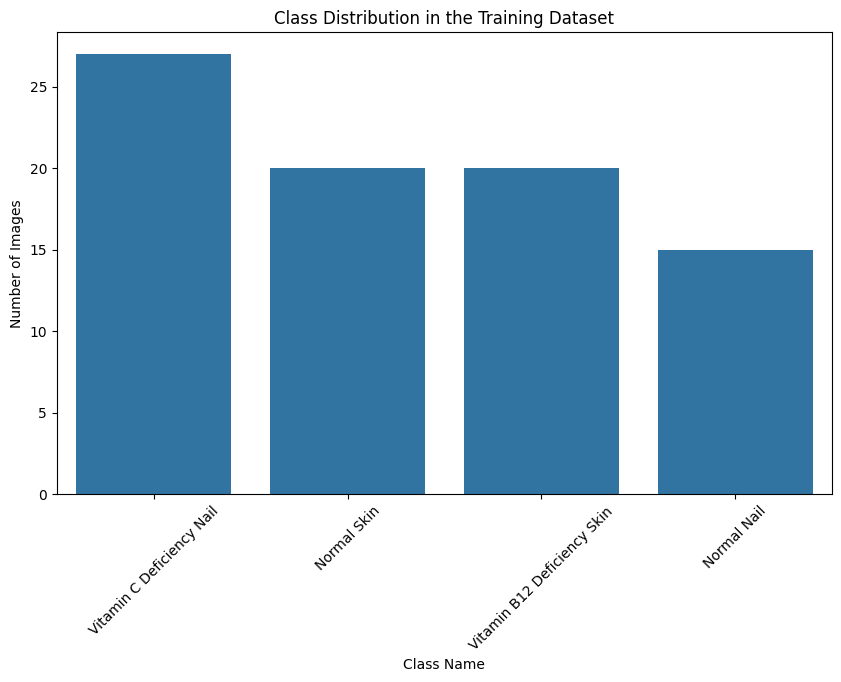

In [56]:
# Display the number of samples (images) in each class in the training dataset
class_counts = tr_df['Class'].value_counts()

# Display the class names and their corresponding counts
print("Class Distribution in the Training Dataset:")
print(class_counts)

# Optionally, you can plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution in the Training Dataset')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


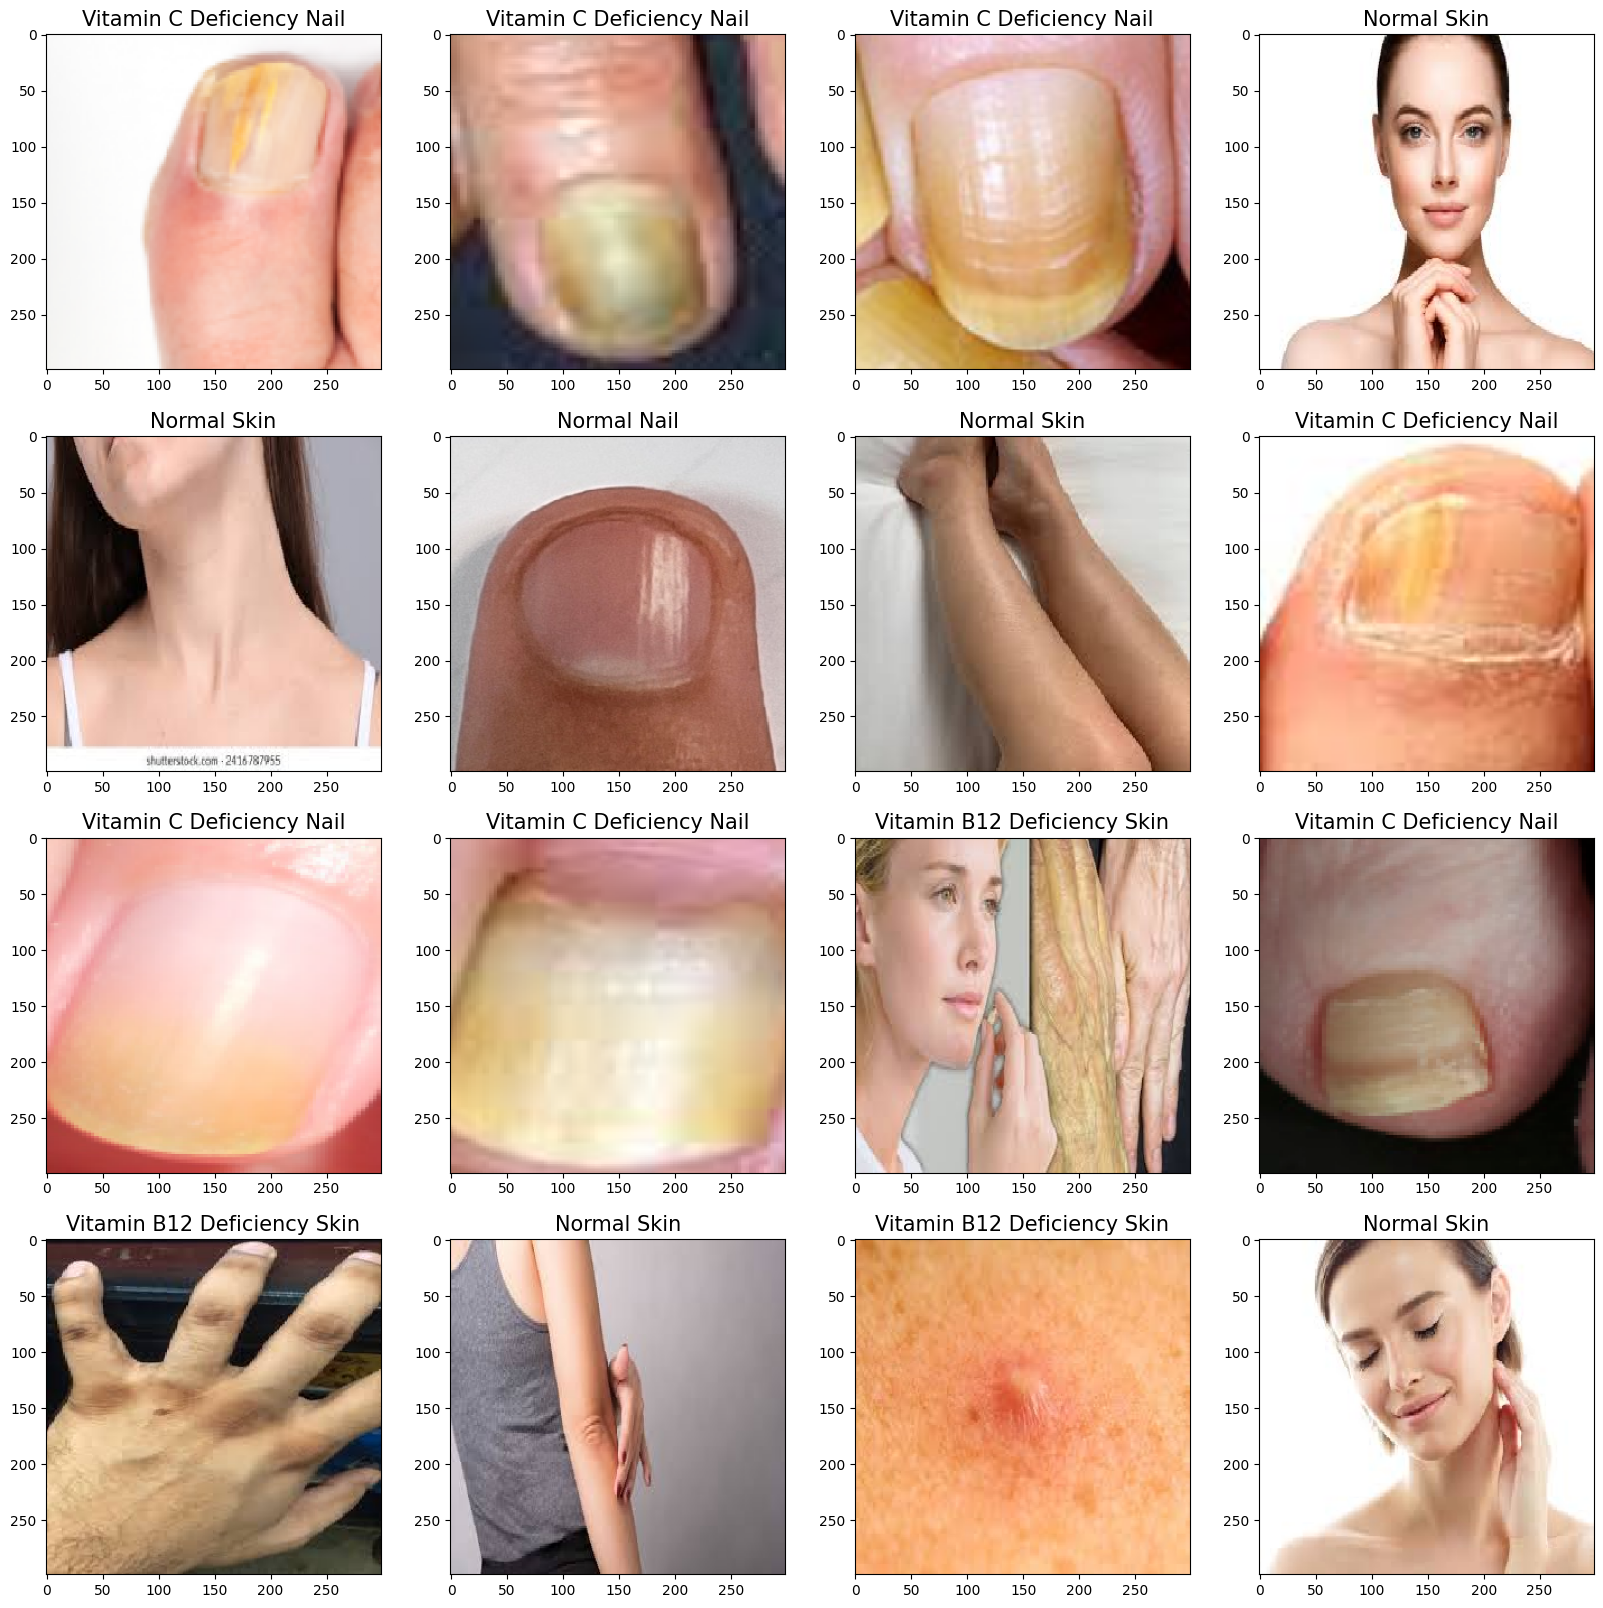

In [57]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

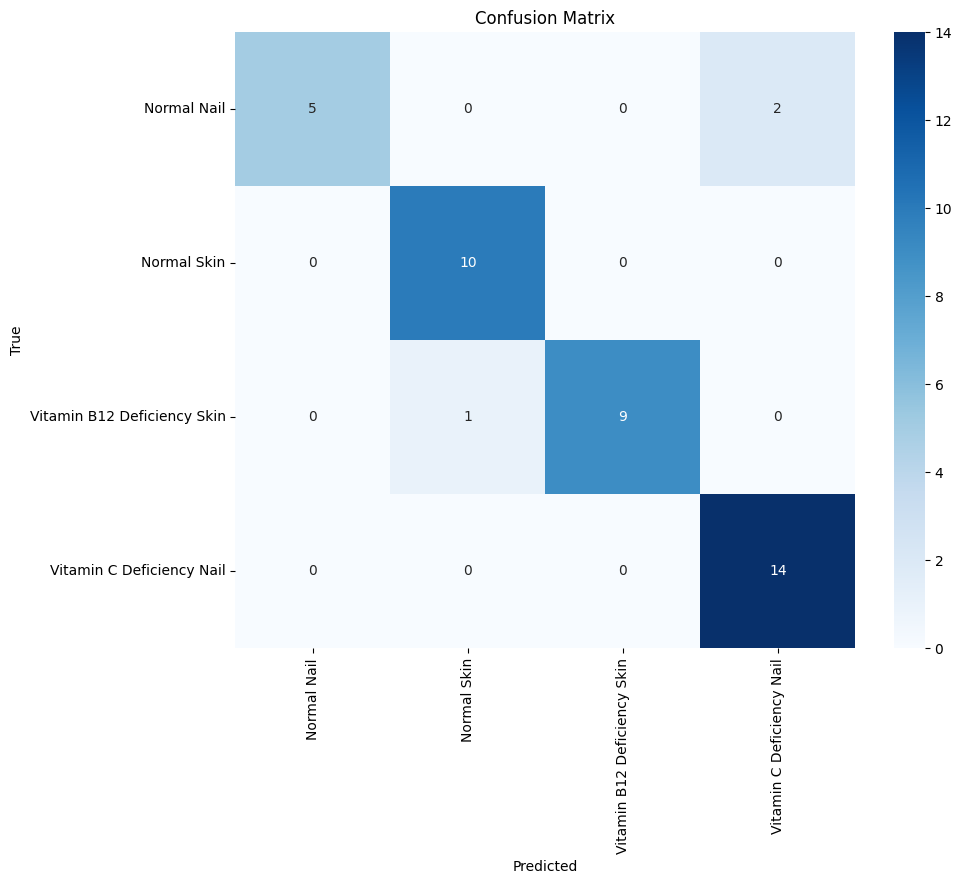

In [58]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the pre-trained model (Xception) without the top layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(*img_size, 3))

# Freeze the base model's layers
base_model.trainable = False

# Build the hypervision model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Prevent overfitting
output = Dense(len(classes), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Display the model summary
model.summary()

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(tr_gen,
                    validation_data=valid_gen,
                    epochs=10,
                    callbacks=[early_stopping, reduce_lr],
                    verbose=1)

# Evaluate the model on the test dataset
test_loss, test_acc, test_precision, test_recall = model.evaluate(ts_gen, verbose=1)

# Display classification metrics
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")

# Confusion matrix
y_true = ts_gen.classes
y_pred = np.argmax(model.predict(ts_gen), axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model
model.save('hypervision_vitamin_model.h5')


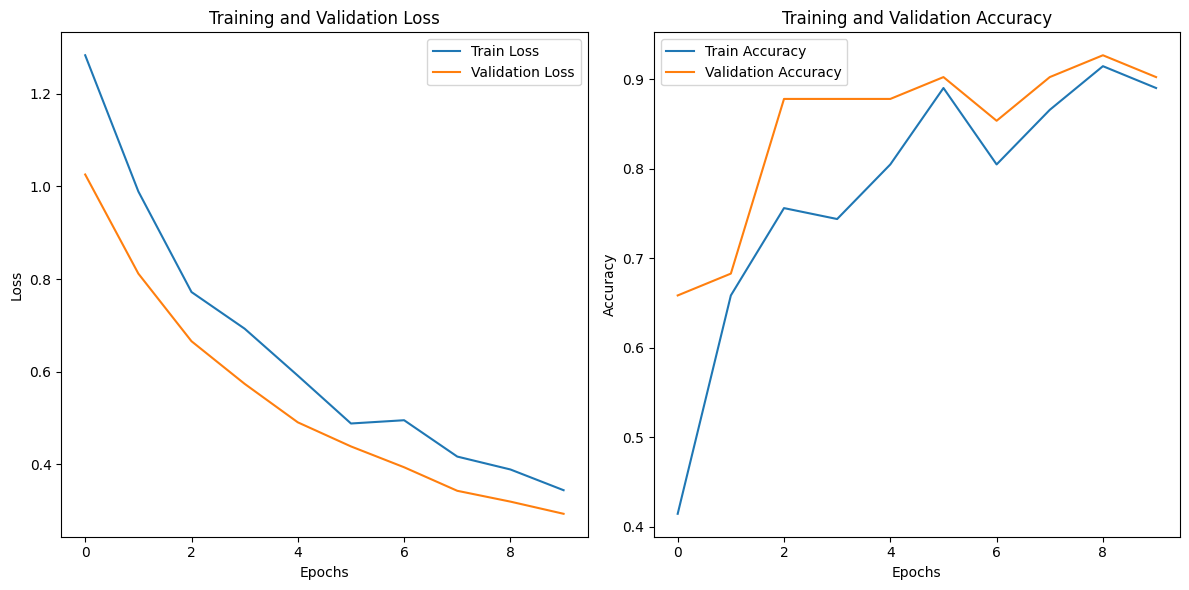

In [59]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Get the true labels and predicted probabilities
y_true = ts_gen.classes
y_pred = model.predict(ts_gen, verbose=1)

# Binarize the true labels for multi-class ROC calculation
lb = LabelBinarizer()
y_true_bin = lb.fit_transform(y_true)

# Get the predicted probabilities for each class
y_pred_prob = model.predict(ts_gen, verbose=1)

# Number of classes
n_classes = len(classes)

# Plot ROC curve
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{classes[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


3/3 [==============================] - 6s 2s/step


1/1 [==============================] - 1s 1s/step


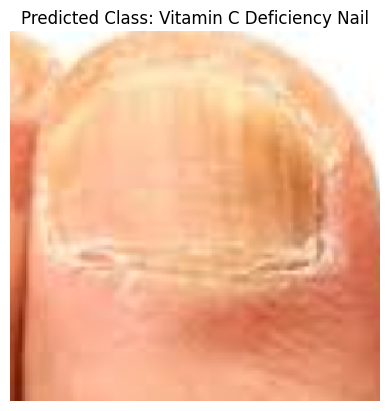

Predicted Class: Vitamin C Deficiency Nail
Prediction Probabilities: [0.36806208 0.0259658  0.03498395 0.5709881 ]


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('hypervision_vitamin_model.h5')

# Define the image size and class labels (updated for 4 classes)
img_size = (299, 299)
class_dict = {0: 'Normal Nail', 1: 'Normal Skin', 2: 'Vitamin B12 Deficiency Skin', 3: 'Vitamin C Deficiency Nail'}  # Correct class names
classes = list(class_dict.values())  # List of class labels in the order the model was trained

def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=img_size)  # Resize image to match the model's input size
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale image pixel values to [0, 1] (since the model was trained with rescaling)
    
    # Make a prediction
    prediction = model.predict(img_array)  # Predict class probabilities
    predicted_class = np.argmax(prediction, axis=1)  # Get the index of the class with the highest probability
    predicted_label = classes[predicted_class[0]]  # Map the index to the class label
    
    # Display the image and the predicted class label
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_label}')
    plt.axis('off')  # Hide axis
    plt.show()

    return predicted_label, prediction[0]

# Example usage:
img_path = 'Test/Vitamin C Deficiency Nail/21.PNG'  # Provide the path to your image
predicted_label, prediction = predict_image(img_path)

print(f"Predicted Class: {predicted_label}")
print(f"Prediction Probabilities: {prediction}")
